In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0


In [4]:
tags = train.iloc[:,2:].sum()

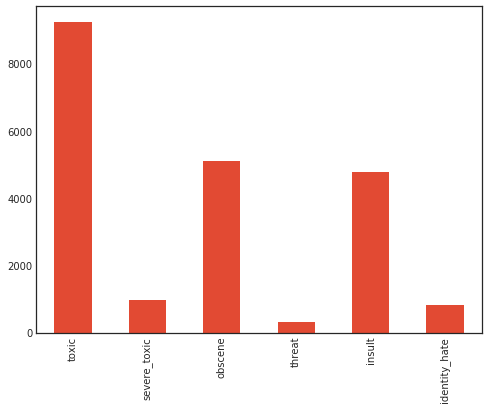

In [5]:
tags.plot.bar()

In [6]:
rowsums=train.iloc[:,2:].sum(axis=1)

In [7]:
train['clean'] = (rowsums == 0)

In [8]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0,False
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0,True
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0,True
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0,True
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0,True


In [9]:
train.shape

(95851, 9)

In [10]:
train.clean.sum()

86061

In [11]:
tags.sum()

21195

In [12]:
def get_missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data.head(20))

In [13]:
get_missing_data(train)

               Total  Percent
clean              0      0.0
identity_hate      0      0.0
insult             0      0.0
threat             0      0.0
obscene            0      0.0
severe_toxic       0      0.0
toxic              0      0.0
comment_text       0      0.0
id                 0      0.0


In [14]:
tags = train.iloc[:,2:].sum()

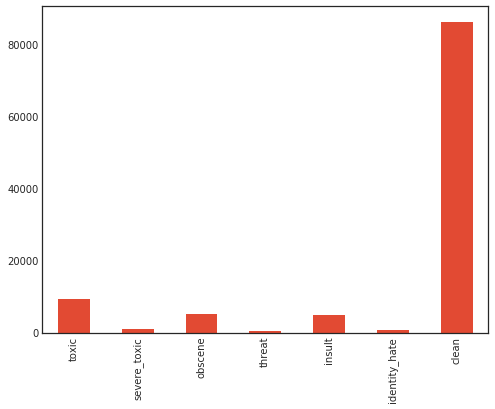

In [15]:
tags.plot.bar()

In [16]:
def bar_plot(x):
    ax= sns.barplot(x.index, x.values, alpha=0.8)
    plt.title("# per class")
    plt.ylabel('# of Occurrences', fontsize=12)
    plt.xlabel('Type ', fontsize=12)
    #adding the text labels
    rects = ax.patches
    labels = x.values
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.show()

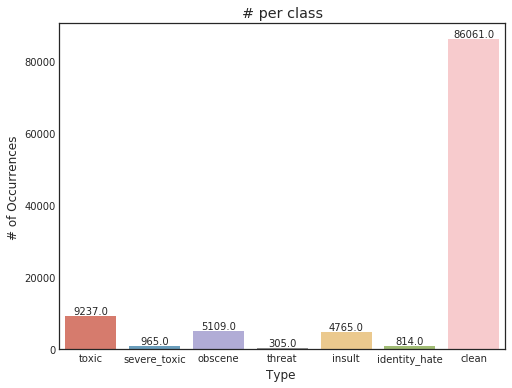

In [17]:
bar_plot(train.iloc[:,2:].sum())

In [18]:
rowsums.value_counts()

0    86061
1     3833
3     2523
2     2107
4     1076
5      231
6       20
dtype: int64

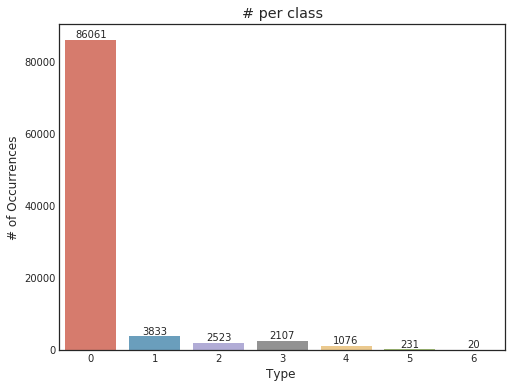

In [19]:
bar_plot(rowsums.value_counts())

In [20]:
def plot_heatmap(df, k, col):
    """
    Arguments:
    df -- input dataframe
    k -- numbers of variables for heatmap
    col -- target variable
    Returns:
    seaborn heatmap
    """
    numerical_features = df.select_dtypes(include=[np.number])
    corr = numerical_features.corr()
    cols = corr.nlargest(k, col)[col].index
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 250 , 15 , as_cmap = True )
    cm = np.corrcoef(df[cols].values.T)
#     plt.figure(figsize=(15,10))
    sns.set(font_scale=1.25)
    hm = sns.heatmap(
                    cm,
                    cmap = cmap,
                    cbar=True, 
                    annot=True, 
                    square=True, 
                    fmt='.2f',
                    annot_kws={'fontsize': 12},
                    xticklabels=cols.values,
                    yticklabels=cols.values,
                    ax = ax
                    )
    plt.yticks(rotation = 0)
#     plt.xticks(rotation = 90) 
    plt.show()

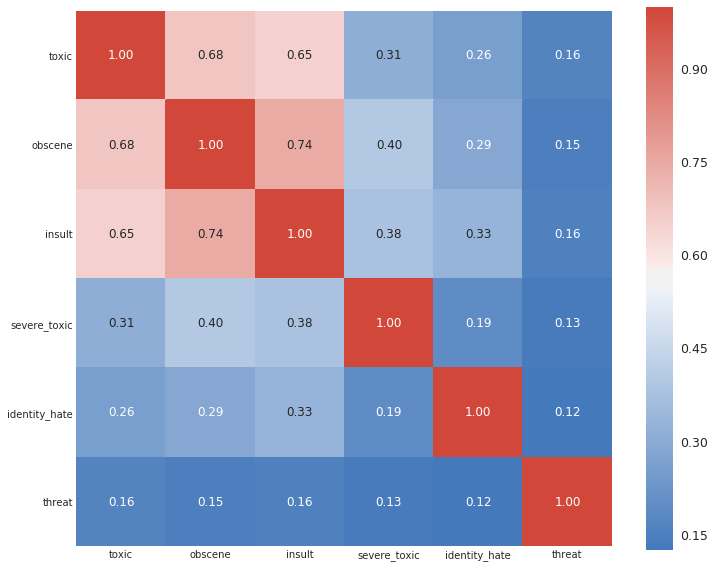

In [21]:
plot_heatmap(train.iloc[:,2:-1], 10 , "toxic")

In [22]:
print("toxic:")
print(train[train.threat==1].iloc[8,1])

toxic:
Personal Attack Number 2 

This is another personal attack about you being a massive donkey dick sucking homosexual. This is a concerned plea that you should at once drown yourself in a sewer. Fucking fuck off you fag! And if you threaten me with legal action again, I'll fucking come over there, tie you to your computer chair and stick my cock up your arse until it bleeds. You fucker!!


In [23]:
test.head()

,id,comment_text
0,6044863,==Orphaned non-free media (Image:41cD1jboEvL. ...
1,6102620,::Kentuckiana is colloquial. Even though the ...
2,14563293,"Hello fellow Wikipedians,\nI have just modifie..."
3,21086297,"AKC Suspensions \nThe Morning Call - Feb 24, 2..."
4,22982444,== [WIKI_LINK: Talk:Celts] ==


In [24]:
col = train.columns[2:-1]
col

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [25]:
train[train["threat"] == 1]["comment_text"].apply(len).sum() / train["threat"].sum()

345.39344262295083

In [26]:
val = []
for i in col:
    val.append(train[train[i] == 1]["comment_text"].apply(len).sum() / train[i].sum())
    

In [27]:
val

[303.7084551261232,
 486.83316062176164,
 300.65335682129574,
 345.39344262295083,
 280.40020986358866,
 344.7751842751843]

In [28]:
mean_series = pd.Series(index=col, data = val)

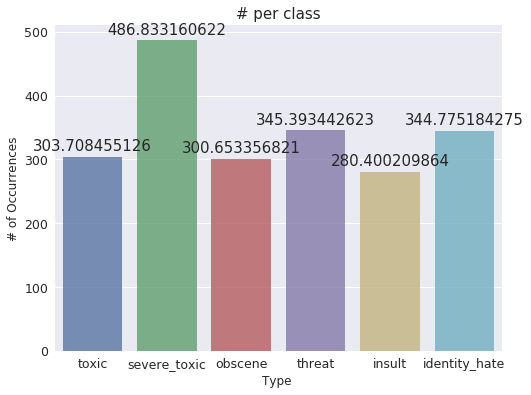

In [29]:
bar_plot(mean_series)

In [30]:
from nltk.corpus import stopwords
import string
eng_stopwords = set(stopwords.words('english'))
def create_features(train, test, col):
    ## Number of words in the text ##
    train["num_words"] = train[col].apply(lambda x: len(str(x).split()))
    test["num_words"] = test[col].apply(lambda x: len(str(x).split()))

    ## Number of unique words in the text ##
    train["num_unique_words"] = train[col].apply(lambda x: len(set(str(x).split())))
    test["num_unique_words"] = test[col].apply(lambda x: len(set(str(x).split())))

    ## Number of characters in the text ##
    train["num_chars"] = train[col].apply(lambda x: len(str(x)))
    test["num_chars"] = test[col].apply(lambda x: len(str(x)))

    ## Number of stopwords in the text ##
    train["num_stopwords"] = train[col].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
    test["num_stopwords"] = test[col].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

    ## Number of punctuations in the text ##
    train["num_punctuations"] =train[col].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
    test["num_punctuations"] =test[col].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

    ## Number of title case words in the text ##
    train["num_words_upper"] = train[col].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
    test["num_words_upper"] = test[col].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

    ## Number of title case words in the text ##
    train["num_words_title"] = train[col].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
    test["num_words_title"] = test[col].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

    ## Average length of the words in the text ##
    train["mean_word_len"] = train[col].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    test["mean_word_len"] = test[col].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [31]:
create_features(train, test, "comment_text")

In [32]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0,False,14,14,83,5,6,1,2,4.857143
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0,True,29,24,142,16,8,2,5,3.758621
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0,True,69,54,411,32,26,2,4,4.869565
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0,True,25,24,148,12,4,0,5,4.920000
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0,True,49,43,266,25,3,1,6,4.448980


In [33]:
feature_drop = ["id","comment_text"]
train_feat_drop = ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]
X = train.drop(feature_drop + ["clean"], axis=1)
test_X = test.drop(feature_drop, axis=1)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import ensemble, metrics, model_selection, naive_bayes
from xgboost import XGBClassifier

/home/himanshu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [43]:
final_df = pd.DataFrame()
# final_df["id"] = test.id

In [44]:
def xgb_model(train_X, valid_X, train_y, valid_y, col):
    model = XGBClassifier(learning_rate =0.01,
                         n_estimators=5000,
                         max_depth=4,
                         min_child_weight=6,
                         gamma=0,
                         subsample=0.8,
                         colsample_bytree=0.8,
                         reg_alpha=0.005,
                         objective= 'binary:logistic',
                         nthread=4,
                         scale_pos_weight=1,
                         seed=27)
    model.fit(train_X, train_y)
    pred = model.predict_proba(test_X)
    final_df[col] = pred[:,1]
    return 1

In [45]:
%%time
val = []
file = 0
X = train.drop(train_feat_drop + feature_drop + ["clean"], axis=1)
for col in train_feat_drop:
    y = train[col]
#     train_X , valid_X , train_y , valid_y = model_selection.train_test_split(X, y , train_size = .10 )
    file = xgb_model(X , valid_X , y , valid_y, col)
#     val.append(sc)
    print(col + " ->  Test Accuracy : ",1)

# acc = pd.Series(data= val, index=train_feat_drop)
# acc.plot.bar()

toxic ->  Test Accuracy :  1
severe_toxic ->  Test Accuracy :  1
obscene ->  Test Accuracy :  1
threat ->  Test Accuracy :  1
insult ->  Test Accuracy :  1
identity_hate ->  Test Accuracy :  1
CPU times: user 1h 8min 57s, sys: 1min 7s, total: 1h 10min 5s
Wall time: 19min 55s


In [46]:
final_df.shape

(226998, 6)

In [47]:
test.shape

(226998, 10)

In [48]:
test.id.shape

(226998,)

In [ ]:
final_df.shape

In [50]:
final_df["id"] = test.id.values

In [51]:
final_df.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,id
0,0.010924,0.001546,0.004998,0.000126,0.006046,0.002797,6044863
1,0.028472,0.000325,0.007463,0.000350,0.010133,0.003166,6102620
2,0.047540,0.000697,0.007836,0.000494,0.007818,0.000151,14563293
3,0.062774,0.004609,0.038239,0.001223,0.037331,0.006883,21086297
4,0.078061,0.001467,0.061597,0.000424,0.031584,0.005467,22982444


In [52]:
final_df.shape

(226998, 7)

In [53]:
final_df = final_df[["id","toxic","severe_toxic","obscene","threat","insult","identity_hate"]]

In [56]:
final_df.to_csv("sub.csv")

In [60]:
final_df = final_df.reset_index()

In [62]:
final_df = final_df.drop(["index"], axis=1)

In [64]:
final_df.set_index("id").to_csv("sub.csv")